<a href="https://colab.research.google.com/github/Thiru609/Machine-Learning-Algorithms/blob/main/SVM_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Thirumurugan A**
Support Vector Machines

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
import random
%matplotlib inline

digits = load_digits()
X = digits.data
y = digits.target
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(digits.data)
reduced_data_pca.shape
print(reduced_data_pca)

[[ -1.25946695  21.27487901]
 [  7.95760828 -20.76871491]
 [  6.99192552  -9.9559734 ]
 ...
 [ 10.80128393  -6.96025086]
 [ -4.87210155  12.42394184]
 [ -0.34438748   6.36556195]]


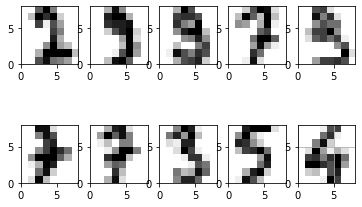

In [ ]:
random_examples = [random.randint(0,len(digits.images)) for i in range(10)]

for n,number in enumerate(random_examples):
    plt.subplot(2, 5, n+1)
    plt.imshow(digits.images[number],cmap='binary', interpolation='none', extent=[0,8,0,8])

plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)
X_train = scaling.transform(X_train)
X_train

array([[-1.   , -1.   , -1.   , ...,  1.   ,  0.75 , -1.   ],
       [-1.   , -1.   ,  0.125, ...,  1.   ,  1.   ,  0.5  ],
       [-1.   , -1.   ,  0.25 , ..., -1.   , -1.   , -1.   ],
       ...,
       [-1.   , -0.5  ,  0.75 , ...,  0.875,  0.   , -1.   ],
       [-1.   , -1.   , -1.   , ...,  1.   ,  0.375, -1.   ],
       [-1.   , -1.   , -1.   , ...,  0.375, -0.875, -1.   ]])

In [ ]:
X_test = scaling.transform(X_test)
X_test

array([[-1.   , -1.   ,  0.125, ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ..., -1.   , -1.   , -1.   ],
       [-1.   , -1.   , -0.25 , ...,  0.5  , -0.875, -1.   ],
       ...,
       [-1.   , -0.75 ,  0.125, ..., -0.875, -1.   , -1.   ],
       [-1.   , -1.   , -1.   , ...,  0.625, -0.875, -1.   ],
       [-1.   , -1.   , -0.75 , ...,  1.   , -0.5  , -1.   ]])

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
clf = svm.fit(X_train, y_train)
scr = clf.score(X_test, y_test)
scr

0.9833333333333333

In [ ]:
svm2 = SVC(kernel='rbf')
clf2 = svm2.fit(X_train, y_train)
scr2 = clf2.score(X_test, y_test)
scr2

0.9861111111111112

In [ ]:
svm3 = SVC(kernel='poly', degree=3, gamma=0.09)
clf3 = svm3.fit(X_train, y_train)
scr3 = clf3.score(X_test, y_test)
scr3

0.9944444444444445

In [ ]:
svm4 = SVC(kernel='rbf', gamma=0.1, C=100)
clf4 = svm4.fit(X_train, y_train)
scr4 = clf4.score(X_test, y_test)
scr4

0.9916666666666667

In [ ]:
y_pred = clf4.predict(X_test)
from sklearn import metrics
print(f"Classification report for classifier {clf4}:\n" f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.98      1.00      0.99        40
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        31
           5       1.00      0.96      0.98        27
           6       0.96      1.00      0.98        26
           7       1.00      0.98      0.99        43
           8       1.00      1.00      1.00        41
           9       0.98      0.98      0.98        43

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg

<function matplotlib.pyplot.show>

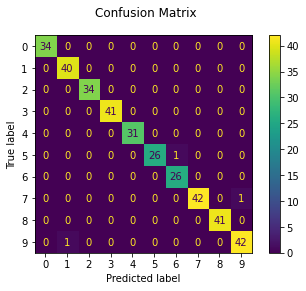

In [ ]:
disp = metrics.plot_confusion_matrix(clf4, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show